# Demo 2: Retrieving OpenStreetMap Data

## 1. What is OpenStreetMap? 

[OpenStreetMap (OSM)](https://www.openstreetmap.org/#map=12/46.5535/6.6524&layers=D) is a free, crowd-sourced, open geographic database updated and maintained by a community of volunteers via open collaboration. Launched in 2004, it has grown into one of the most comprehensive and detailed sources of geographic information available



### Key Features of OSM Data: 

 1. Geometries: OSM data consists of geometries such as points, lines, and polygons representing various geographic features like roads, buildings, parks, and more.

 2. Attributes: Each geometry in OSM is associated with a set of attributes, providing additional information about the feature, such as its name, type, and other relevant metadata.

 3. Tagging System: OSM uses a tagging system to organize and classify different types of features. Tags consist of key-value pairs that describe the properties of a feature. For example, a road might be tagged with "highway=residential" to indicate it is a residential street.

 4. Community Contributions: OSM data is created and maintained by a global community of volunteers. Contributors use satellite imagery, GPS devices, and local knowledge to update and improve the map.

### Applications of OSM Data:

 - Urban Planning and Development: OSM data is valuable for urban planners and developers to analyze the built environment, identify infrastructure needs, and plan for future growth.

 - Disaster Response and Humanitarian Aid: OSM is often used in disaster response efforts to map affected areas, assess damage, and coordinate relief efforts.

 - Navigation and Routing: OSM powers numerous navigation and routing applications, providing up-to-date and detailed map data for users around the world

### 1.1 Quick demo on the OSM page : https://www.openstreetmap.org

## 2. Using OSMnx to Download OSM Data

(NOTE: To use OSMnx, you first need to install it into your environment. For this demo, we have already installed it. But for the future, you can always install it using `conda install osmnx` or `pip install osmnx`)

Imports for the demo: 

In [241]:
# Imports

# Pour la visualisation
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline
import contextily as cx

# Pour manipuler des données géospatiales
import geopandas as gpd
from shapely.geometry import Polygon, box

import pandas as pd


# Pour récupérer des données OpenStreetMap
import osmnx as ox

### 2.1  Download street network data for a specific location

(NOTE: we will tackle this subjet with more detail in the next demo)

In [242]:
# Define the location (e.g., city name or coordinates)
city_aoi = "Cuernavaca, Mexico"
# Fetch OSM street network from the location
roads_G = ox.graph_from_place(city_aoi, network_type="all")

# The network_type parameter allows you to specify the type of street network to download
# (e.g., "all", "drive", "bike", "walk").

In [243]:
# Let's check the which type of data object we donload.
type(roads_G)

networkx.classes.multidigraph.MultiDiGraph

A DiGraph is a data type that stores nodes and edges with optional data, or attributes. What we can see here is that this data type belongs to a Python module called networkx that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. 


To visualize the graph osmnx has the `plot_graph()`function. `



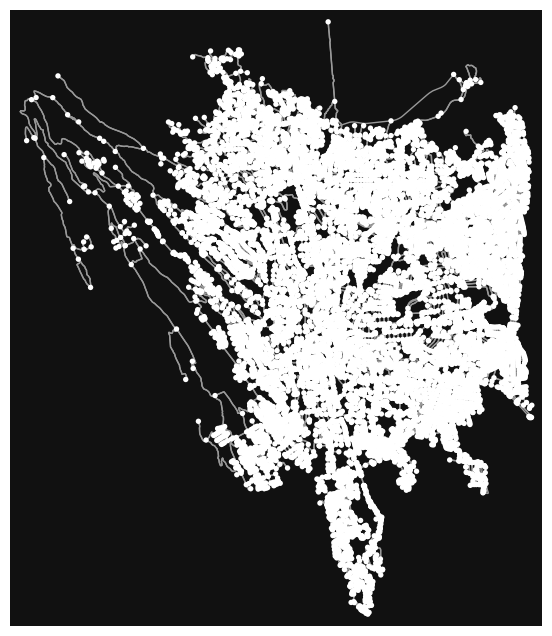

In [244]:
# Plot the streets
fig, ax = ox.plot_graph(roads_G)

### 2.2 Exploring the Different Data Layers Available

OpenStreetMap represents physical features on the ground (e.g., buildings, amenities, waterways) using tags attached to its basic data structures (its nodes, ways, and relations). 

Please refer to the [OSM Wiki](https://wiki.openstreetmap.org/wiki/Map_features) to find out more about all the differents map features.

Here is how you can download the features with the `features_from_place()` function.

#### 2.2.1. Building  data 

You can check in the [OSM Wiki](https://wiki.openstreetmap.org/wiki/Buildings), all the tags thats you can find with the 'amenity' key.  

In [292]:
# Download building data
buildings = ox.features_from_place(city_aoi, tags={"building": True})

# What types are those?
print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>


As a result we got the data as GeoDataFrames.

In [246]:
buildings.head()

amenity building                           name  \
element_type osmid                                                          
node         323247345   hospital   office  Servicios de Salud de Morelos   
             4539024128       NaN    hotel                  Azul Turquesa   
             4714302536       NaN    house                  Casa de Doris   
             5362226966       NaN      yes                      Auditorio   
             5837311886       NaN   school             Escuela De Idiomas   

                                           geometry access  source  \
element_type osmid                                                   
node         323247345   POINT (-99.23718 18.91984)    NaN     NaN   
             4539024128  POINT (-99.23146 18.90237)    NaN  survey   
             4714302536  POINT (-99.25525 18.95993)    NaN     NaN   
             5362226966  POINT (-99.21841 18.87817)    NaN     NaN   
             5837311886  POINT (-99.23368 18.91798)    NaN     NaN   

                        source:date parking historic layer  ...  bar  \
element_type osmid                                          ...        
node         323247345          NaN     NaN      NaN   NaN  ...  NaN   
             4539024128  03-12-2016     NaN      NaN   NaN  ...  NaN   
             4714302536         NaN     NaN      NaN   NaN  ...  NaN   
             5362226966         NaN     NaN      NaN   NaN  ...  NaN   
             5837311886         NaN     NaN      NaN   NaN  ...  NaN   

                        contact:facebook payment:maestro  \
element_type osmid                                         
node         323247345               NaN             NaN   
             4539024128              NaN             NaN   
             4714302536              NaN             NaN   
             5362226966              NaN             NaN   
             5837311886              NaN             NaN   

                        payment:visa_electron reservation rooms ways type  \
element_type osmid                                                          
node         323247345                    NaN         NaN   NaN  NaN  NaN   
             4539024128                   NaN         NaN   NaN  NaN  NaN   
             4714302536                   NaN         NaN   NaN  NaN  NaN   
             5362226966                   NaN         NaN   NaN  NaN  NaN   
             5837311886                   NaN         NaN   NaN  NaN  NaN   

                        tourism_1 full_name  
element_type osmid                           
node         323247345        NaN       NaN  
             4539024128       NaN       NaN  
             4714302536       NaN       NaN  
             5362226966       NaN       NaN  
             5837311886       NaN       NaN  

[5 rows x 114 columns]

- Get specific type of building :

In [247]:
hotel = ox.features_from_place(city_aoi, tags={"building": "hotel"})

In [248]:
hotel.head()

building           name  source source:date  \
element_type osmid                                                    
node         4539024128    hotel  Azul Turquesa  survey  03-12-2016   
way          275251354     hotel            NaN    Bing         NaN   
             617691613     hotel            NaN     NaN         NaN   
             618006721     hotel            NaN     NaN         NaN   

                                                                  geometry  \
element_type osmid                                                           
node         4539024128                         POINT (-99.23146 18.90237)   
way          275251354   POLYGON ((-99.25034 18.97181, -99.25039 18.971...   
             617691613   POLYGON ((-99.23387 18.92046, -99.23398 18.920...   
             618006721   POLYGON ((-99.23603 18.92030, -99.23602 18.920...   

                                                                     nodes  \
element_type osmid                                                           
node         4539024128                                                NaN   
way          275251354   [2798856487, 2798856488, 2798856489, 279885649...   
             617691613   [5838859664, 5838904583, 5838859665, 584460212...   
             618006721   [5841671078, 5841671083, 5841673190, 584167108...   

                          addr:city addr:housenumber addr:postcode  \
element_type osmid                                                   
node         4539024128         NaN              NaN           NaN   
way          275251354          NaN              NaN           NaN   
             617691613   Cuernavaca              110         62000   
             618006721          NaN              NaN           NaN   

                                         addr:street  
element_type osmid                                    
node         4539024128                          NaN  
way          275251354                           NaN  
             617691613   Fray Bartolomé de las Casas  
             618006721                           NaN

#### 2.2.2 OSM Eelements 

Elements are the basic components of OpenStreetMap's conceptual data model of the physical world. Elements are of three types:

- nodes (defining points in space),
- ways (defining linear features and area boundaries), and
- relations (which are sometimes used to explain how other elements work together).

In [249]:
# Polygons
# buildings.loc["way"].explore()

![](../images/Screenshot%202024-02-20%20at%2014.04.35.png)

- Why do we have nodes in the building data? 

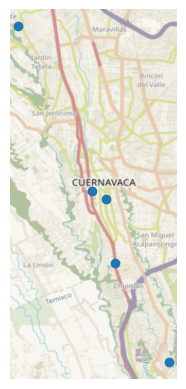

In [250]:
# Points
ax = buildings.loc["node"].plot()
cx.add_basemap(ax, crs=buildings.crs.to_string(), attribution="")
ax.set_axis_off()

- What is a relation ? 

In [269]:
# Multipolygons
buildings.loc["relation"].explore()

- Which type of element we should keep? 
Buildings are not just single points; they have shapes and boundaries. The way elements in OSM represent these shapes as collections of nodes connected by line segments. By extracting and considering these way elements, you capture the geometry of the building, allowing for accurate measurements of area, perimeter, and other geometric properties.

- Get the area of the building ? 


In [312]:
# Get the area of the first polygon in the GeoDataFrame
buildings["area"] = buildings["geometry"].area

/var/folders/vs/r3fy_xr57wq7t0j69q6nx7540000gn/T/ipykernel_51908/3154913534.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings["area"] = buildings["geometry"].area


Calculating the area of a single point (node) would not provide an accurate representation of the building's size. Points have no area; they are infinitesimally small. 

In [313]:
buildings["area"]

element_type  osmid     
node          323247345     0.000000e+00
              4539024128    0.000000e+00
              4714302536    0.000000e+00
              5362226966    0.000000e+00
              5837311886    0.000000e+00
                                ...     
relation      13773022      1.053993e-07
              13773023      7.373049e-08
              13773024      5.134122e-08
              13780831      7.522402e-08
              14141231      2.222400e-06
Name: area, Length: 3626, dtype: float64

Bonus note:

 Plot using colors : plotting with color enhances data visualization by adding another dimension.

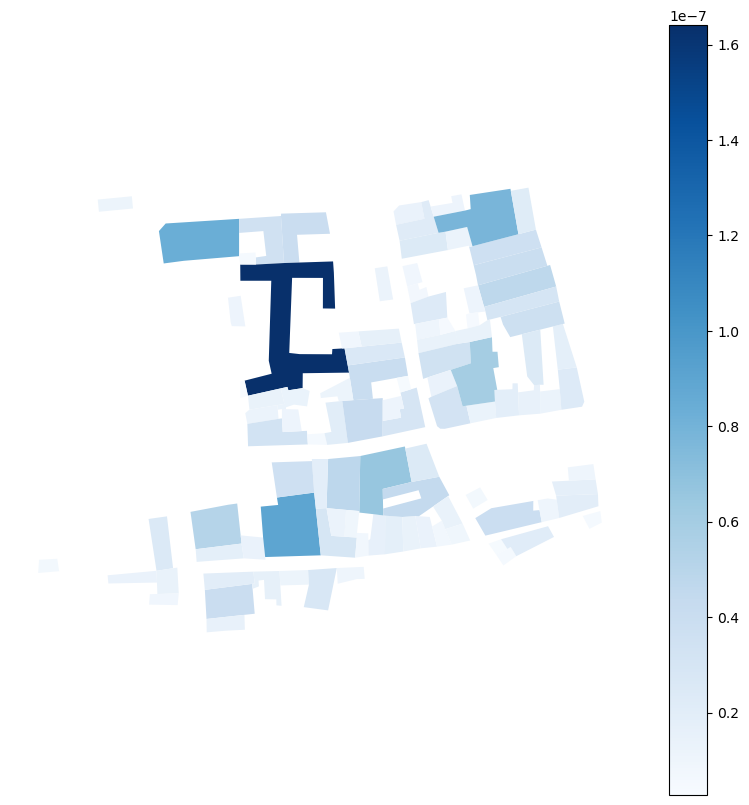

In [272]:
f, ax = plt.subplots(figsize=(10, 10))
buildings[3000:3100].plot(
    column="area", ax=ax, legend=True, cmap="Blues"
)
ax.set_axis_off()
plt.show()

#### 2.2.3. Amenities (POIS)

You can check in the [OSM Wiki](https://wiki.openstreetmap.org/wiki/Key:amenity), all the tags thats you can find with the 'amenity' key.  

OpenStreetMap (OSM) is a database of geographic information that anyone can contribute to and use. Since it relies on contributions from volunteers all over the world, the amount and accuracy of data can vary depending on the location.

When you're searching for information in a well-known place like New York City, which is a major metropolitan area with a large population and many contributors, you're likely to find a wealth of detailed information.

On the other hand, if you're searching in a smaller town like Cuernavaca, which may have fewer contributors and less frequent updates, the amount and detail of information available on OSM might be more limited. You might still find some bars and other points of interest, but there might be fewer of them listed, with less detail provided.

In [257]:
city2_aoi = "New york, usa"

# Retrieve schools
bars_city = ox.features_from_place(city_aoi, tags={"amenity": "bar"})
bars_city2 = ox.features_from_place(city2_aoi, tags={"amenity": "bar"})

In [258]:
# How many schools we got?
print("We got", len(bars_city), "bars in", city_aoi)
print("We got", len(bars_city2), "bars in", city2_aoi)

We got 4 bars in Cuernavaca, Mexico
We got 1206 bars in New york, usa


In [259]:
bars_city2["geometry"]

element_type  osmid     
node          368043598                            POINT (-74.00215 40.73380)
              419366609                            POINT (-73.97993 40.74357)
              419367969                            POINT (-73.98776 40.66767)
              484076447                            POINT (-73.96348 40.67544)
              484078905                            POINT (-73.95112 40.71203)
                                                  ...                        
way           665897391     POLYGON ((-73.98875 40.74762, -73.98886 40.747...
              975290224     POLYGON ((-74.01076 40.70442, -74.01066 40.704...
              1073233725    POLYGON ((-74.03058 40.61689, -74.03057 40.616...
relation      12554650      MULTIPOLYGON (((-73.98014 40.69965, -73.98029 ...
              16271497      MULTIPOLYGON (((-73.84680 40.74887, -73.84676 ...
Name: geometry, Length: 1206, dtype: geometry

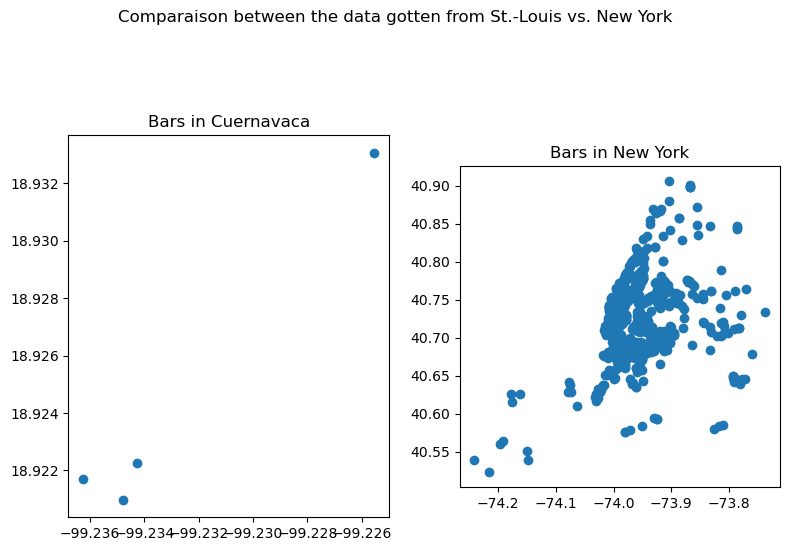

In [273]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
fig.suptitle("Comparaison between the data gotten from St.-Louis vs. New York")


# Plot bars in the first city (st-louis)
bars_city.plot(ax=ax1)
# Add title
ax1.set_title("Bars in Cuernavaca")

# Plot bars in the first city (st-louis)
bars_city2.plot(ax=ax2)
# Add title
ax2.set_title("Bars in New York")


# Tight layout often produces nice results
# But requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

We can explore the GeopDataFrame: 

In [274]:
bars_city2.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:state', 'addr:street', 'amenity', 'ele', 'gnis:county_name',
       'gnis:feature_id',
       ...
       'nodes', 'height', 'building:levels', 'kitchen_hours', 'drink:cocktail',
       'building:colour', 'roof:material', 'roof:shape', 'ways', 'type'],
      dtype='object', length=189)

You can select the columns you are interested in : 

In [262]:
cols = [
    "name",
    "addr:country",
    "addr:housenumber",
    "addr:postcode",
    "addr:state",
    "addr:street",
    "addr:city",
    "opening_hours",
]

In [263]:
bars_city2[cols]

name addr:country  \
element_type osmid                                                           
node         368043598                          Stonewall Inn           US   
             419366609                          Craft + Carry          NaN   
             419367969                            Winemak'her          NaN   
             484076447                     Washington Commons          NaN   
             484078905                                Barcade          NaN   
...                                                       ...          ...   
way          665897391                         O'Reilly's Pub          NaN   
             975290224                          Havana Social          NaN   
             1073233725                        Kelly's Tavern          NaN   
relation     12554650    Kings County Distillery Tasting Room          NaN   
             16271497                      Baseline Cocktails          NaN   

                        addr:housenumber addr:postcode addr:state  \
element_type osmid                                                  
node         368043598                53         10014         NY   
             419366609               NaN           NaN        NaN   
             419367969               NaN           NaN        NaN   
             484076447               748         11238        NaN   
             484078905               388         11211         NY   
...                                  ...           ...        ...   
way          665897391                54         10001        NaN   
             975290224                45         10004         NY   
             1073233725             9259         11209        NaN   
relation     12554650                NaN           NaN        NaN   
             16271497                NaN           NaN        NaN   

                                addr:street addr:city  \
element_type osmid                                      
node         368043598   Christopher Street  New York   
             419366609                  NaN       NaN   
             419367969                  NaN       NaN   
             484076447    Washington Avenue       NaN   
             484078905         Union Avenue  Brooklyn   
...                                     ...       ...   
way          665897391     West 31st Street  New York   
             975290224         Stone Street  New York   
             1073233725          4th Avenue       NaN   
relation     12554650                   NaN       NaN   
             16271497                   NaN       NaN   

                                                             opening_hours  
element_type osmid                                                          
node         368043598                                                 NaN  
             419366609                                                 NaN  
             419367969   Tu-Th 14:00-23:00; Fr 14:00-23:30+; Sa 12:00-2...  
             484076447                                                 NaN  
             484078905   Mo-Th 16:00-04:00; Fr 14:00-04:00; Sa-Su 12:00...  
...                                                                    ...  
way          665897391                                         11:00-02:00  
             975290224                                                 NaN  
             1073233725                                                NaN  
relation     12554650                                                  NaN  
             16271497                                                  NaN  

[1206 rows x 8 columns]

Visualize the geoDataFrame: 

Text(0.5, 1.0, 'Bars in New York')

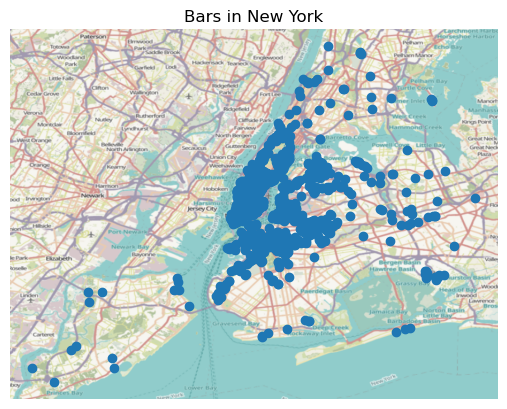

In [275]:
ax = bars_city2.plot()
cx.add_basemap(ax, crs=bars_city2.crs.to_string(), attribution="")
ax.set_axis_off()
ax.set_title("Bars in New York")

#### 2.2.4. Waterways 


You can check in the [OSM Wiki](https://wiki.openstreetmap.org/wiki/Waterways), all the tags thats you can find with the 'waterway' key.  

<Axes: >

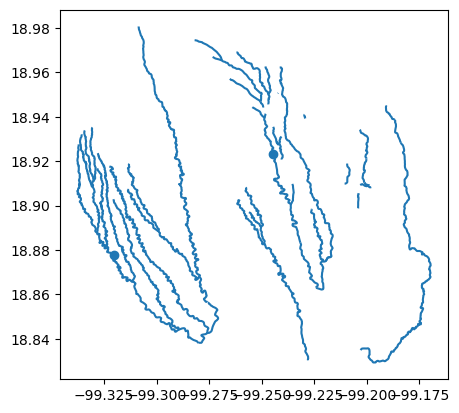

In [265]:
# Fetch waterway data from OpenStreetMap
waterways = ox.features_from_place(city_aoi, tags={"waterway": True})

# Convert the waterways to a GeoDataFrame
waterways_gdf = gpd.GeoDataFrame(waterways)

# Plot the waterways (optional)
waterways_gdf.plot()

### 2.3 From graph to gdf 

The street network data was not in GeoDataFrame format (it was networkx.MultiDiGraph). Luckily, osmnx provides a convenient function `graph_to_gdfs()`` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

In [266]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(roads_G)
print("Nodes:\n", nodes.head(), "\n")
print("Edges:\n", edges.head(), "\n")
print("Type:", type(edges))

Nodes:
                    y          x  street_count highway  \
osmid                                                   
273437020  18.987600 -99.198649             3     NaN   
273437035  18.980180 -99.213584             3     NaN   
273437073  18.964102 -99.222702             4     NaN   
273437079  18.963633 -99.217290             3     NaN   
273437081  18.964791 -99.215480             3     NaN   

                             geometry  
osmid                                  
273437020  POINT (-99.19865 18.98760)  
273437035  POINT (-99.21358 18.98018)  
273437073  POINT (-99.22270 18.96410)  
273437079  POINT (-99.21729 18.96363)  
273437081  POINT (-99.21548 18.96479)   

Edges:
                                osmid                  name      highway  \
u         v          key                                                  
273437020 9459408767 0    1009404494  Calle de la Estación     tertiary   
          9459408755 0    1009404494  Calle de la Estación     tertiary   
  

### 2.4 Plot 

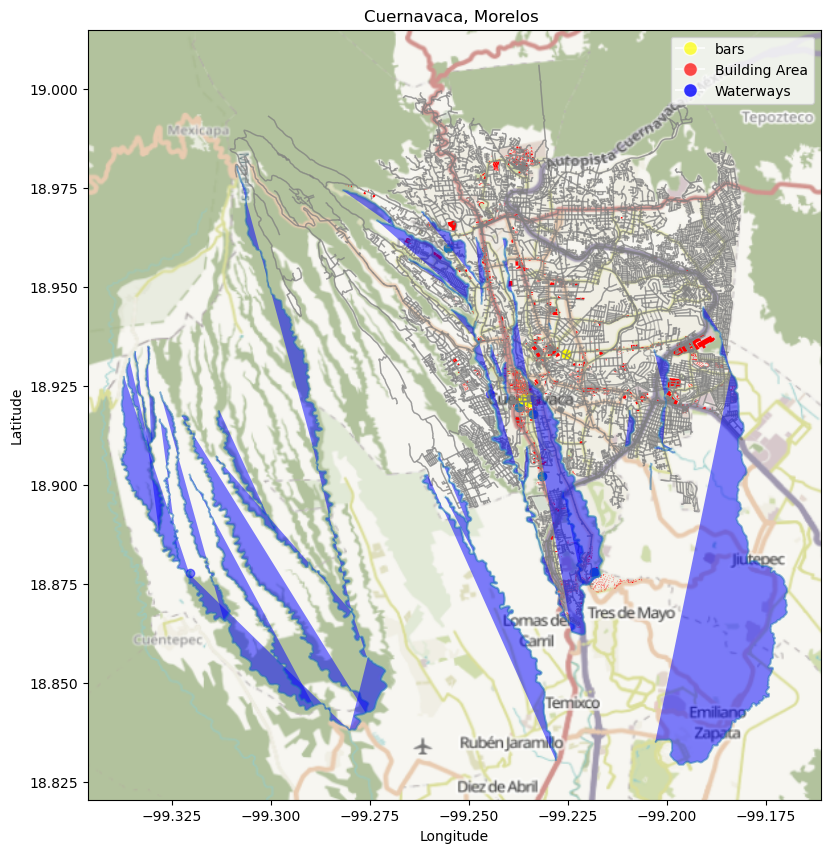

In [310]:

# Plot street edges
ax = edges.plot(figsize=(10, 10), linewidth=1, edgecolor="grey", alpha=0.5)

# Plot the waterways
waterways.plot(ax=ax, facecolor="blue", alpha=0.5)


# Plot buildings
buildings.plot(ax=ax, facecolor="red")

# Plot restaurants
bars_city.to_crs(edges.crs).plot(ax=ax, color="yellow", markersize=40)

# Create custom legend handles
legend_handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="yellow",
        markersize=10,
        label="bars",
        alpha=0.7,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="red",
        markersize=10,
        label="Building Area",
        alpha=0.7,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="blue",
        markersize=10,
        label="Waterways",
        alpha=0.8,
    ),
]

# Add basemap using Contextily
cx.add_basemap(ax, crs=edges.crs.to_string(), attribution="")

# Add legend with custom handles
ax.legend(handles=legend_handles)

plt.title("Cuernavaca, Morelos ")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


plt.show()